## OpenCV Dlib Face Recognition

In [1]:
import os
import _pickle as cPickle
import dlib
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
import time
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

## Load Model

In [2]:
# Path to landmarks and face recognition model files
PREDICTOR_PATH = DATA_PATH + 'models/shape_predictor_68_face_landmarks.dat'
FACE_RECOGNITION_MODEL_PATH = DATA_PATH + 'dlap_week4/models/dlib_face_recognition_resnet_model_v1.dat'

# Initialize face detector, facial landmarks detector 
# and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor(PREDICTOR_PATH)
faceRecognizer = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

## Enrollement

In [3]:
# Now let's prepare our training data
# data is organized assuming following structure
# faces folder has subfolders.
# each subfolder has images of a person
faceDatasetFolder = DATA_PATH + 'dlap_week4/images/faces'

# read subfolders in folder "faces"
subfolders = []
for x in os.listdir(faceDatasetFolder):
  xpath = os.path.join(faceDatasetFolder, x)
  if os.path.isdir(xpath):
    subfolders.append(xpath)

# nameLabelMap is dict with keys as person's name
# and values as integer label assigned to this person
# labels contain integer labels for corresponding image in imagePaths
nameLabelMap = {}
labels = []
imagePaths = []
for i, subfolder in enumerate(subfolders):
  for x in os.listdir(subfolder):
    xpath = os.path.join(subfolder, x)
    if x.endswith('jpg'):
      imagePaths.append(xpath)
      labels.append(i)
      nameLabelMap[xpath] = subfolder.split('/')[-1]

In [4]:
# Process images one by one
# We will store face descriptors in an ndarray (faceDescriptors)
# and their corresponding labels in dictionary (index)
index = {}
i = 0
faceDescriptors = None
for imagePath in imagePaths:
  print("processing: {}".format(imagePath))
  # read image and convert it to RGB
  img = cv2.imread(imagePath)

  # detect faces in image
  faces = faceDetector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  print("{} Face(s) found".format(len(faces)))
  # Now process each face we found
  for k, face in enumerate(faces):

    # Find facial landmarks for each detected face
    shape = shapePredictor(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), face)

    # convert landmarks from Dlib's format to list of (x, y) points
    landmarks = [(p.x, p.y) for p in shape.parts()]

    # Compute face descriptor using neural network defined in Dlib.
    # It is a 128D vector that describes the face in img identified by shape.
    faceDescriptor = faceRecognizer.compute_face_descriptor(img, shape)

    # Convert face descriptor from Dlib's format to list, then a NumPy array
    faceDescriptorList = [x for x in faceDescriptor]
    faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
    faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]

    # Stack face descriptors (1x128) for each face in images, as rows
    if faceDescriptors is None:
      faceDescriptors = faceDescriptorNdarray
    else:
      faceDescriptors = np.concatenate((faceDescriptors, faceDescriptorNdarray), axis=0)

    # save the label for this face in index. We will use it later to identify
    # person name corresponding to face descriptors stored in NumPy Array
    index[i] = nameLabelMap[imagePath]
    i += 1

processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/intro_000007.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/intro_000103.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/making_000319.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/satya_making_004377.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/making_003991.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/satya_making_004146.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/Study/LearnOpenCV/src/res/opencv-courses/dlap_week4/images/faces/satya/satya_making_004208.jpg
1 Face(s) found
processing: /Users/iqbal/Iqbal/S

In [5]:
# Write descriors and index to disk
np.save('descriptors.npy', faceDescriptors)
# index has image paths in same order as descriptors in faceDescriptors
with open('index.pkl', 'wb') as f:
  cPickle.dump(index, f)

## Testing

In [11]:
# Path to landmarks and face recognition model files
PREDICTOR_PATH = DATA_PATH + 'models/shape_predictor_68_face_landmarks.dat'
FACE_RECOGNITION_MODEL_PATH = DATA_PATH + 'dlap_week4/models/dlib_face_recognition_resnet_model_v1.dat'

THRESHOLD = 0.5

# Initialize face detector, 
# facial landmarks detector and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor(PREDICTOR_PATH)
faceRecognizer = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

# load descriptors and index file generated during enrollment
index = np.load('index.pkl', allow_pickle=True)
faceDescriptorsEnrolled = np.load('descriptors.npy')
type(faceDescriptorsEnrolled)

numpy.ndarray

In [7]:
# read image
imagePath = DATA_PATH + 'dlap_week4/images/faces/satya_demo.jpg'
im = cv2.imread(imagePath, cv2.IMREAD_COLOR)

# exit if unable to read frame from feed
if im is None:
  print ('cannot read image')

# convert image from BGR to RGB
# because Dlib used RGB format
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

## Inference

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
time taken = 0.052 seconds


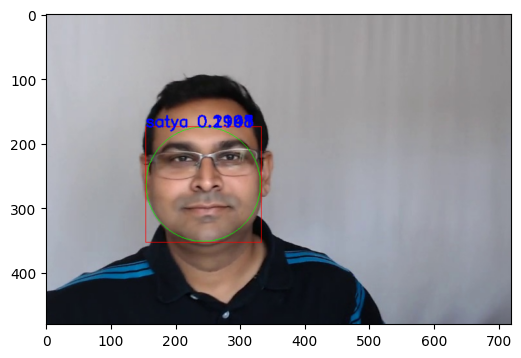

In [13]:
t = time.time()

# detect faces in image
faces = faceDetector(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

# Now process each face we found
for face in faces:

  # Find facial landmarks for each detected face
  shape = shapePredictor(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), face)

  # find coordinates of face rectangle
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()

  # Compute face descriptor using neural network defined in Dlib
  # using facial landmark shape
  faceDescriptor = faceRecognizer.compute_face_descriptor(im, shape)

  # Convert face descriptor from Dlib's format to list, then a NumPy array
  faceDescriptorList = [m for m in faceDescriptor]
  faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
  faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]
  print(type(faceDescriptorNdarray))
  print(type(faceDescriptorsEnrolled))
  # Calculate Euclidean distances between face descriptor calculated on face dectected
  # in current frame with all the face descriptors we calculated while enrolling faces
  distances = np.linalg.norm(faceDescriptorsEnrolled - faceDescriptorNdarray, axis=1)
  # Calculate minimum distance and index of this face
  argmin = np.argmin(distances)  # index
  minDistance = distances[argmin]  # minimum distance

  # Dlib specifies that in general, if two face descriptor vectors have a Euclidean
  # distance between them less than 0.6 then they are from the same
  # person, otherwise they are from different people.

  # This threshold will vary depending upon number of images enrolled
  # and various variations (illuminaton, camera quality) between
  # enrolled images and query image
  # We are using a threshold of 0.5

  # If minimum distance if less than threshold
  # find the name of person from index
  # else the person in query image is unknown
  if minDistance <= THRESHOLD:
    label = index[argmin]
  else:
    label = 'unknown'

  print("time taken = {:.3f} seconds".format(time.time() - t))

  # Draw a rectangle for detected face
  cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255))

  # Draw circle for face recognition
  center = (int((x1 + x2)/2.0), int((y1 + y2)/2.0))
  radius = int((y2-y1)/2.0)
  color = (0, 255, 0)
  cv2.circle(im, center, radius, color, thickness=1, lineType=8, shift=0)

  # Write test on image specifying identified person and minimum distance
  org = (int(x1), int(y1))  # bottom left corner of text string
  font_face = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 0.8
  text_color = (255, 0, 0)
  printLabel = '{} {:0.4f}'.format(label, minDistance)
  cv2.putText(im, printLabel, org, font_face, font_scale, text_color, thickness=2)


  # Show result
plt.imshow(im[:,:,::-1])
plt.show()